In [1]:
import os
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display
from typing import List, Dict, Optional
import seaborn as sns
from collections import Counter 

In [2]:
albums = pd.read_csv('albums.csv')

In [3]:
albums.head()

,album_name,album_uri
0,The Cookbook,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K
1,In The Zone,spotify:album:0z7pVBGOD7HCIB7S8eLkLI
2,Dangerously In Love (Alben für die Ewigkeit),spotify:album:25hVFAxTlDvXbx2X2QkUkE
3,Justified,spotify:album:6QPkyl04rXwTGlGlcYaRoW
4,Hot Shot,spotify:album:6NmFmPX56pcLBOFMhIiKvF


In [4]:
artists = pd.read_csv('artists.csv')

In [5]:
artists.head()

,artist_name,artist_uri
0,Missy Elliott,spotify:artist:2wIVse2owClT7go1WT98tk
1,Britney Spears,spotify:artist:26dSoYclwsYLMAKD3tpOr4
2,Beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m
3,Justin Timberlake,spotify:artist:31TPClRtHm23RisEBtV3X7
4,Shaggy,spotify:artist:5EvFsr3kj42KNv97ZEnqij


In [6]:
pl_tracks = pd.read_csv('pl_tracks.csv')

In [7]:
pl_tracks.head()

,pid,track_uri
0,0_0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI
1,0_0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak
2,0_0,spotify:track:0WqIKmW4BTrj3eJFmnCKMv
3,0_0,spotify:track:1AWQoqb9bSvzTjaLralEkT
4,0_0,spotify:track:1lzr43nnXAijIGYnCT8M8H


In [8]:
tracks = pd.read_csv('tracks.csv')

In [9]:
tracks.head()

,track_name,duration_ms,track_uri,artist_uri,album_uri
0,Lose Control (feat. Ciara & Fat Man Scoop),226863,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K
1,Toxic,198800,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI
2,Crazy In Love,235933,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,spotify:album:25hVFAxTlDvXbx2X2QkUkE
3,Rock Your Body,267266,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,spotify:album:6QPkyl04rXwTGlGlcYaRoW
4,It Wasn't Me,227600,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,spotify:album:6NmFmPX56pcLBOFMhIiKvF


## Number of artist per playlist

In [10]:
df_artitst_playlist = pd.merge(pl_tracks,tracks[['track_uri','artist_uri']],on='track_uri', how='left')

In [11]:
df_playlist_unique = df_artitst_playlist.groupby(['pid']).agg({'artist_uri':'nunique'})

In [12]:
df_playlist_unique = df_playlist_unique.reset_index()

In [52]:
mean_artist = df_playlist_unique.artist_uri.mean()
print(mean_artist)

38.088211


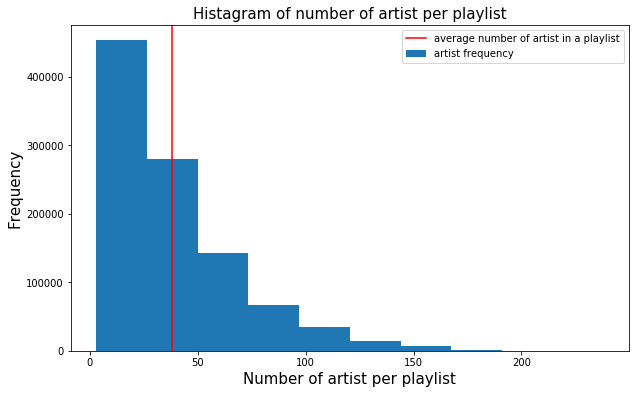

In [14]:
# Make the plot
plt.figure(figsize = (10,6))
plt.hist(x = df_playlist_unique.artist_uri,label = 'artist frequency')
plt.axvline(x= mean_artist ,label = 'average number of artist in a playlist',color = 'red')
plt.xlabel('Number of artist per playlist',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.title('Histagram of number of artist per playlist',fontsize = 15)
plt.legend()

Interpretation: According to the plot, most playlists contain less than 50 different artists. The average number of artists contained per playlist is about 38 artists. 

## Number of tracks per playlist / Length of each playlist (frequency plot)

In [ ]:
# Calculate number of playlist:
df_track_playlist = pl_tracks.groupby(by = 'pid').size().reset_index(name='counts')

In [60]:
mean_track = df_track_playlist.counts.mean()
print(mean_track)

66.346428


# Made the plot

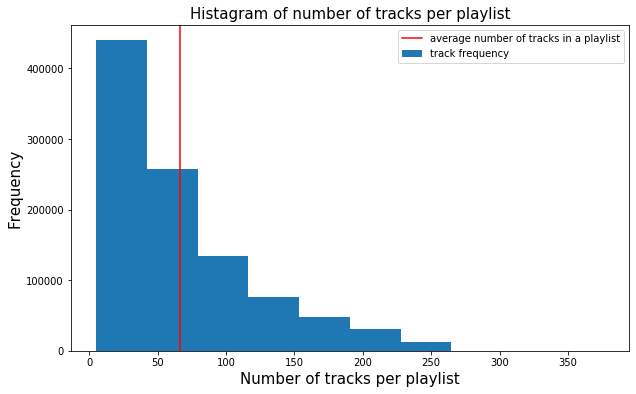

In [58]:
plt.figure(figsize = (10,6))
plt.hist(x = df_track_playlist.counts,label = 'track frequency')
plt.axvline(x= mean_track,label = 'average number of tracks in a playlist',color = 'red')
plt.xlabel('Number of tracks per playlist',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.title('Histagram of number of tracks per playlist',fontsize = 15)
plt.legend()

Interpretation: According to the plot, most playlists contain less than 100 different tracks. The average number of tracks contained per playlist is about 66 tracks. 

## Distribution of popular tracks 

In [17]:
# Find the most popular tracks
df_track_order = pl_tracks.groupby(by = 'track_uri').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [18]:
df_track_order.head()

,track_uri,counts
2128659,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574
573135,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447
2257360,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309
2085721,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079
1041889,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987


In [19]:
# I will choose the top 100 most popular songs
df_100_track = df_track_order.iloc[0:99,:]

In [20]:
df_100_track.head()

,track_uri,counts
2128659,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574
573135,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447
2257360,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309
2085721,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079
1041889,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987


In [22]:
# Find the corresponding track name
df_100_trackname = tracks.loc[tracks.track_uri.isin(df_100_track.track_uri)]
df_top100 = df_100_track.merge(df_100_trackname,on = 'track_uri')

In [23]:
df_top100.head()

,track_uri,counts,track_name,duration_ms,artist_uri,album_uri
0,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574,HUMBLE.,177000,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,spotify:album:4eLPsYPBmXABThSJ821sqY
1,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447,One Dance,173986,spotify:artist:3TVXtAsR1Inumwj472S9r4,spotify:album:3hARKC8cinq3mZLLAEaBh9
2,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309,Broccoli (feat. Lil Yachty),225205,spotify:artist:5M0lbkGluOPXLeFjApw8r8,spotify:album:0NrZHZ0y5kTO8EHliuUUca
3,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079,Closer,244960,spotify:artist:69GGBxA162lTqCwzJG5jLp,spotify:album:0rSLgV8p5FzfnqlEk4GzxE
4,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987,Congratulations,220293,spotify:artist:246dkjvS1zLTtiykXe5h60,spotify:album:5s0rmjP8XOPhP6HhqOhuyC


# Plot the top 30 songs

Text(0.5, 0, 'Frequency')

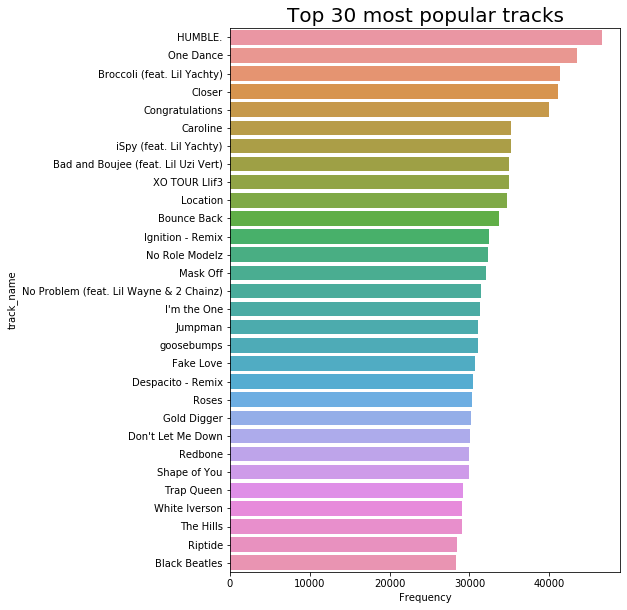

In [64]:
plt.figure(figsize = (7,10))
sns.barplot(x = 'counts',y = 'track_name', data = df_top100[:30])
plt.title('Top 30 most popular tracks',fontsize = 20)
plt.xlabel('Frequency' )

Interpretation: The 10 tracks that are the most popular in the million playlist dataset are HUMBLE., One Dance, Broccoli (feat. Lil Yachty), Closer, Congratulations, Caroline, iSpy (feat. Lil Yachty), Bad and Boujee (feat. Lil Uzi Vert), XO TOUR Llif3, Location. Top songs are mostly rap and/or trap music, indicating this might be the general taste of music that year.

In [63]:
# Calculate percentage of each playlist that contains the top 100 tracks
df_contain= pl_tracks.loc[pl_tracks.track_uri.isin(df_100_track.track_uri)]

In [26]:
df_contain_pid = df_contain.groupby(by = 'pid').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

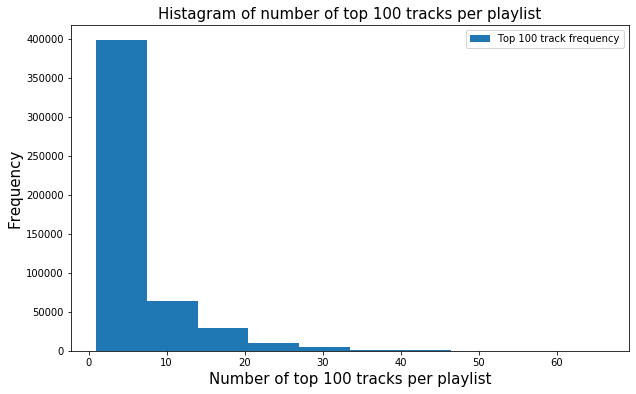

In [27]:
# General Idea of frequency of those top 100 tracks in the playlist
plt.figure(figsize = (10,6))
plt.hist(x = df_contain_pid.loc[df_contain_pid.counts> 0].counts,label = 'Top 100 track frequency')
plt.xlabel('Number of top 100 tracks per playlist',fontsize =15)
plt.ylabel('Frequency',fontsize =15)
plt.title('Histagram of number of top 100 tracks per playlist',fontsize = 15)
plt.legend()

Interpretation: From the above graph, about half of the playlists contain at least one of the top 100 popular songs. It is also noticeable that some of playlists contain over 40 songs from the top 100 popular songs. It might not be a bad idea to recommend the songs from the top tracks as a baseline model.

## Most common words for top 1000 tracks

In [28]:
df_1000_track = df_track_order.iloc[0:999,:]
df_1000_trackname = tracks.loc[tracks.track_uri.isin(df_1000_track.track_uri)]
df_top1000 = df_1000_track.merge(df_1000_trackname,on = 'track_uri')

In [29]:
top1000_list = df_top1000.track_name.tolist()

In [30]:
split_words = [words for segments in top1000_list for words in segments.split()]
Most = Counter(split_words) 
Top50 = Most.most_common(50)
Top50df = pd.DataFrame(Top50,columns = ['Word','Counts'])

In [31]:
Top50df.head()

,Word,Counts
0,-,81
1,(feat.,67
2,You,64
3,The,61
4,Me,50


Text(0.5, 0, 'Frequency')

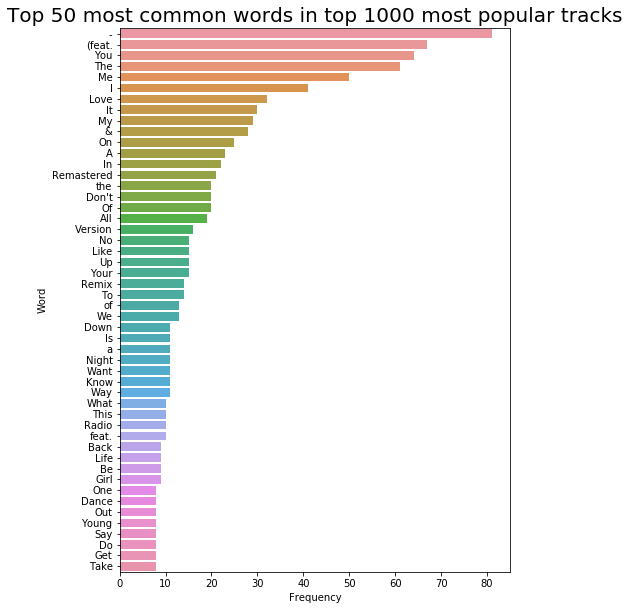

In [67]:
plt.figure(figsize = (7,10))
sns.barplot(x = 'Counts',y = 'Word', data = Top50df)
plt.title('Top 50 most common words in top 1000 most popular tracks',fontsize = 20)
plt.xlabel('Frequency' )

Interpretation: The most common words in the track names appear to be some English stop words such as 'You', 'The', 'Me', 'I', which do not provide any specific domain information. And these words don't have a very high frequency after all. Therefore, we don't consider the title name as an important feature in our project this time.

In [33]:
###Duration
1/60000*tracks.loc[:,'duration_ms'].describe() #convert the duration from ms to minutes
tracks[tracks['duration_ms'] == max(tracks['duration_ms'])]

,track_name,duration_ms,track_uri,artist_uri,album_uri
2262198,The Hound of the Baskervilles - Sir Arthur Con...,20744575,spotify:track:65qH0fE7j8MrtvWFnBmm87,spotify:artist:0AGYqur7KNfaJwyzMvIuRz,spotify:album:3h8zOg0Av4Yx6EDWPM95rA


Text(0, 0.5, 'Density')

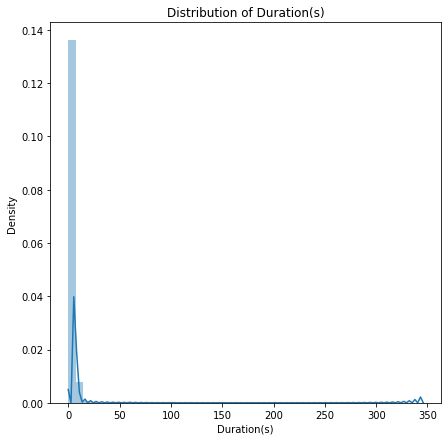

In [70]:
plt.figure(figsize = (7,7))
sns.distplot(tracks.loc[:,'duration_ms']/60000)
plt.title('Distribution of Duration(min)')
plt.xlabel('Duration(min)')
plt.ylabel('Density')

Interpretation: Most songs are are below 8.3 minute long. The mean of the duration is about 4.1167 minutes. The maximum value of duration is about 346 minutes, for the song The Hound of the Baskervilles - Sir Arthur Conan Doyle.

In [35]:
###Artist
artists = pd.read_csv("artists.csv")

In [36]:
#Create a dataframe for the top 10 popular artists that have the most tracks
artist_most_songs = pd.DataFrame({'Artist':tracks['artist_uri'].value_counts()[:10].index.tolist(),'Count':tracks['artist_uri'].value_counts().head(10)})
artist_most_songs.index= range(1,11)

In [37]:
#Merge the artist with most songs dataset with the artist dataset to get the artist names
artist_most_songs_name = pd.merge(artist_most_songs,
                 artists,
                 left_on= 'Artist',
                 right_on = 'artist_uri')
artist_most_songs_name.head()

,Artist,Count,artist_name,artist_uri
0,spotify:artist:5aIqB5nVVvmFsvSdExz408,5417,Johann Sebastian Bach,spotify:artist:5aIqB5nVVvmFsvSdExz408
1,spotify:artist:4NJhFmfw43RLBLjQvxDuRS,5260,Wolfgang Amadeus Mozart,spotify:artist:4NJhFmfw43RLBLjQvxDuRS
2,spotify:artist:2wOqMjp9TyABvtHdOSOTUS,4312,Ludwig van Beethoven,spotify:artist:2wOqMjp9TyABvtHdOSOTUS
3,spotify:artist:7y97mc3bZRFXzT2szRM4L4,3128,Frédéric Chopin,spotify:artist:7y97mc3bZRFXzT2szRM4L4
4,spotify:artist:3MKCzCnpzw3TjUYs2v7vDA,2609,Pyotr Ilyich Tchaikovsky,spotify:artist:3MKCzCnpzw3TjUYs2v7vDA


In [38]:
tracks_art = pd.merge(pl_tracks,tracks[['track_uri','artist_uri']],on ='track_uri',how = 'left')

In [39]:
#Create a dataframe for the top 50 popular artists
top_artist = pd.DataFrame({'Artist':tracks_art['artist_uri'].value_counts()[:50].index.tolist(),'Count':tracks_art['artist_uri'].value_counts().head(50)})
top_artist.index = range(1,51)

In [40]:
#Merge the top_artist dataset with the artist dataset to get the artist names
top_artist_name = pd.merge(top_artist,
                 artists,
                 left_on= 'Artist',
                 right_on = 'artist_uri')
top_artist_name.head()

,Artist,Count,artist_name,artist_uri
0,spotify:artist:3TVXtAsR1Inumwj472S9r4,846937,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,413297,Kanye West,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x
2,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,353624,Kendrick Lamar,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg
3,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,339570,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H
4,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,316603,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ


Text(0.5, 0, 'Frequency')

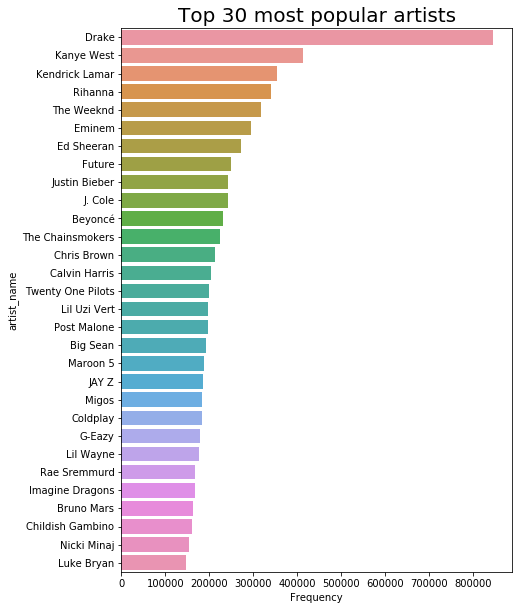

In [72]:
# Plot the top 50 artists
plt.figure(figsize = (7,10))
sns.barplot(x = 'Count',y = 'artist_name', data = top_artist_name[:30])
plt.title('Top 30 most popular artists',fontsize = 20)
plt.xlabel('Frequency' )

Interpretation: The artists that have the most songs collected in the million playlist dataset are Johann Sebastian Bach, Wolfgang Amadeus Mozart, Ludwig van Beethoven, Frédéric Chopin, Pyotr Ilyich Tchaikovsk, Various Artists, Vitamin String Quartet, Grateful Dead, Frank Sinatra, Piano Tribute Players. The top five artists that appear the most frequently in the million playlist dataset are Drake, Kanye West, Kendrick Lamar, Rihanna and The Weekend. It appears that pop song singers are more popular in this dataset even though classifical pianists tend to have more songs in the dataset.

In [42]:
###Album
albums = pd.read_csv("albums.csv")

In [43]:
#Create a dataframe for the top 10 albums that have the most tracks
album_most_songs = pd.DataFrame({'Album':tracks['album_uri'].value_counts()[:10].index.tolist(),'Count':tracks['album_uri'].value_counts().head(10)})
album_most_songs.index = range(1,11)

In [44]:
#Merge the top_artist dataset with the album dataset to get the album names
album_most_songs_name = pd.merge(album_most_songs,
                 albums,
                 left_on= 'Album',
                 right_on = 'album_uri')
album_most_songs_name.head()

,Album,Count,album_name,album_uri
0,spotify:album:082BH67sSIDefLxUp8GgNm,139,"Glee: The Music, The Complete Season Three",spotify:album:082BH67sSIDefLxUp8GgNm
1,spotify:album:52nZGRpZ9wuAsaDCwfadr5,135,Big Vivaldi Box,spotify:album:52nZGRpZ9wuAsaDCwfadr5
2,spotify:album:6WlzaRoDShdgVgaqJRjyNH,131,"Glee: The Music, The Complete Season Two",spotify:album:6WlzaRoDShdgVgaqJRjyNH
3,spotify:album:6tQ1p5gjEujiZGAK10pY1f,129,The Complete Hank Williams,spotify:album:6tQ1p5gjEujiZGAK10pY1f
4,spotify:album:5dw8l7eXBnmGYUIw9riuwT,122,123 Favorite Kids Songs,spotify:album:5dw8l7eXBnmGYUIw9riuwT


In [45]:
#Select the first ten words to represent the album name
album_most_songs_name['album_name'] = [" ".join(i.split()[:10]) for i in album_most_songs_name['album_name']]

In [46]:
album_most_songs_name['album_name'].head()

0    Glee: The Music, The Complete Season Three
1                               Big Vivaldi Box
2      Glee: The Music, The Complete Season Two
3                    The Complete Hank Williams
4                       123 Favorite Kids Songs
Name: album_name, dtype: object

Text(0.5, 0, '# of Tracks')

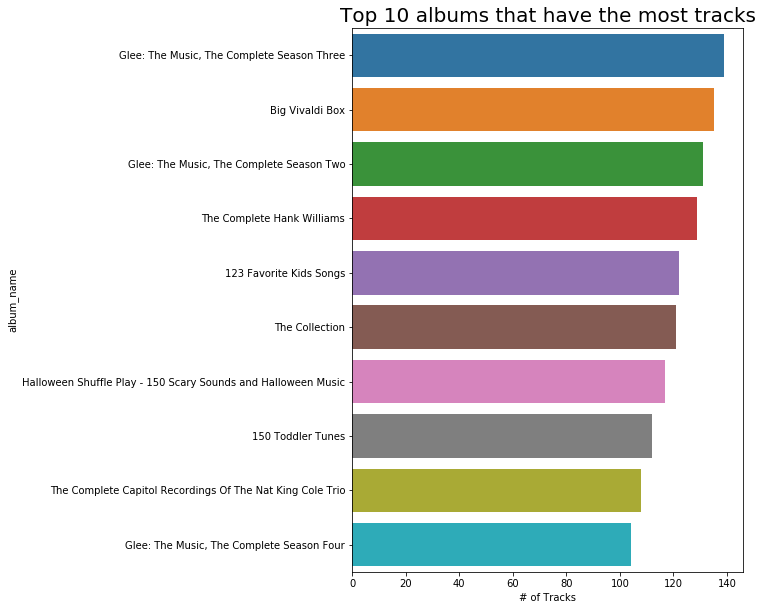

In [73]:
#Plot the top 10 albums that have the most tracks
plt.figure(figsize = (7,10))
sns.barplot(x = 'Count',y = 'album_name', data = album_most_songs_name)
plt.title('Top 10 albums that have the most tracks',fontsize = 20)
plt.xlabel('# of Tracks' )

In [48]:
tracks_alb = pd.merge(pl_tracks,tracks[['track_uri','album_uri']],on ='track_uri',how = 'left')

In [49]:
#Create a dataframe for the top 50 popular albums
top_album = pd.DataFrame({'Album':tracks_alb['album_uri'].value_counts()[:50].index.tolist(),'Count':tracks_alb['album_uri'].value_counts().head(50)})
top_album.index = range(1,51)

In [50]:
#Merge the top_artist dataset with the artist dataset to get the artist names
top_album_name = pd.merge(top_album,
                 albums,
                 left_on= 'Album',
                 right_on = 'album_uri')
top_album_name.head()

,Album,Count,album_name,album_uri
0,spotify:album:5s0rmjP8XOPhP6HhqOhuyC,156488,Stoney,spotify:album:5s0rmjP8XOPhP6HhqOhuyC
1,spotify:album:4eLPsYPBmXABThSJ821sqY,141638,DAMN.,spotify:album:4eLPsYPBmXABThSJ821sqY
2,spotify:album:71QyofYesSsRMwFOTafnhB,133050,Coloring Book,spotify:album:71QyofYesSsRMwFOTafnhB
3,spotify:album:6kf46HbnYCZzP6rjvQHYzg,120946,American Teen,spotify:album:6kf46HbnYCZzP6rjvQHYzg
4,spotify:album:2AvupjUeMnSffKEV05x222,120017,Culture,spotify:album:2AvupjUeMnSffKEV05x222


Text(0.5, 0, 'Frequency')

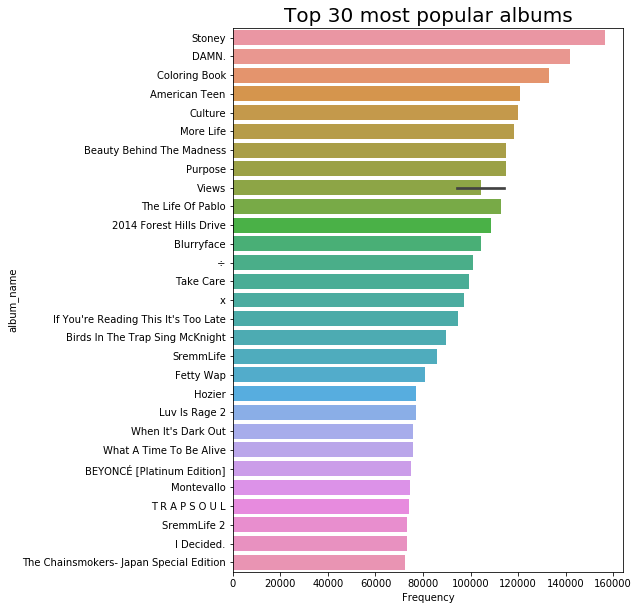

In [74]:
# Plot the top 30 albums
plt.figure(figsize = (7,10))
sns.barplot(x = 'Count',y = 'album_name', data = top_album_name[:30])
plt.title('Top 30 most popular albums',fontsize = 20)
plt.xlabel('Frequency' )

Interpretation: According to this distribution plot, we can see that the glee albums have the most tracks, followed by albums such as Big Vivaldi Box, 123 Favorite Kids Songs. In terms of popularity, Stoney, DAMN, Coloring Book, American Teen, and Culture are the top 5 albums that have tracks appear the most frequently in the playlist population. These albums are by Post Malone, Kendrick Lamar, Khalid, Migos and so on who also appear to be the popular artists.